In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import homogeneity_score, accuracy_score, f1_score, normalized_mutual_info_score, adjusted_rand_score, silhouette_score
from scipy.stats import mode

In [16]:
embeddings = np.load("/Users/arjuns/Downloads/code_res_paper/paper-results-code/gnn/ds/v1/graph2vec_embeddings.npy")
labels = np.load("/Users/arjuns/Downloads/code_res_paper/paper-results-code/gnn/ds/v1/graph2vec_labels.npy")

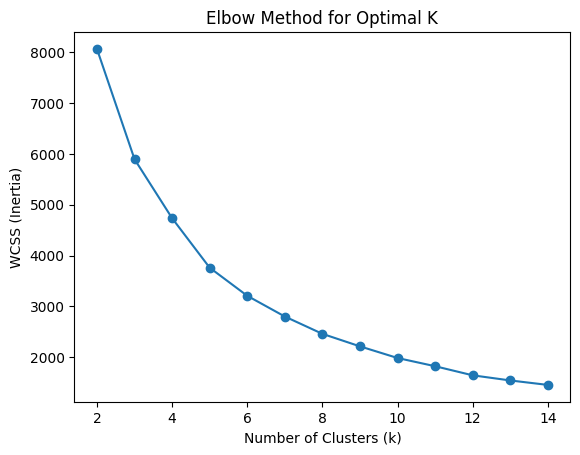

In [ ]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

wcss = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(reduced_embeddings)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [26]:
optimal_ks = range(2, 15)
all_scores = {}
for optimal_k in optimal_ks:
    print("Optimal K:", optimal_k)
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(reduced_embeddings)

    dbscan = DBSCAN()
    dbscan_labels = dbscan.fit_predict(reduced_embeddings)

    def cluster_acc(y_true, y_pred):
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        labels = np.zeros_like(y_pred)
        for i in np.unique(y_pred):
            mask = (y_pred == i)
            if np.sum(mask) == 0:
                continue
            labels[mask] = mode(y_true[mask])[0]
        return accuracy_score(y_true, labels)
    
    all_scores[optimal_k] = {
        "kmeans": {
            "homogeneity": homogeneity_score(labels, kmeans_labels),
            "acc": cluster_acc(labels, kmeans_labels),
            "f1": f1_score(labels, kmeans_labels, average='macro'),
            "nmi": normalized_mutual_info_score(labels, kmeans_labels),
            "ari": adjusted_rand_score(labels, kmeans_labels),
            "silhouette": silhouette_score(reduced_embeddings, kmeans_labels)
        },
        "dbscan": {
            "homogeneity": homogeneity_score(labels, dbscan_labels),
            "acc": cluster_acc(labels, dbscan_labels),
            "f1": f1_score(labels, dbscan_labels, average='macro'),
            "nmi": normalized_mutual_info_score(labels, dbscan_labels),
            "ari": adjusted_rand_score(labels, dbscan_labels),
            "silhouette": silhouette_score(reduced_embeddings, dbscan_labels)
        }
    }

# find the best k for each method using all metrics

best_kmeans = max(all_scores.items(), key=lambda x: x[1]["kmeans"]["acc"])
best_dbscan = max(all_scores.items(), key=lambda x: x[1]["dbscan"]["acc"])

print("Best KMeans:", best_kmeans)
print("Best DBSCAN:", best_dbscan)

Optimal K: 2
Optimal K: 3
Optimal K: 4
Optimal K: 5
Optimal K: 6
Optimal K: 7
Optimal K: 8
Optimal K: 9
Optimal K: 10
Optimal K: 11
Optimal K: 12
Optimal K: 13
Optimal K: 14
Best KMeans: (13, {'kmeans': {'homogeneity': 0.14887131360973627, 'acc': 0.23836052526860327, 'f1': 0.07280895606274099, 'nmi': 0.15293690392469328, 'ari': 0.050494561231083986, 'silhouette': 0.33447036}, 'dbscan': {'homogeneity': 0.00778754126290681, 'acc': 0.08714683645045762, 'f1': 0.010580021482277121, 'nmi': 0.014945686783977135, 'ari': 0.0001556686359894732, 'silhouette': 0.34686184}})
Best DBSCAN: (2, {'kmeans': {'homogeneity': 0.0445441221657489, 'acc': 0.14206128133704735, 'f1': 0.025999198924805716, 'nmi': 0.07059157891063292, 'ari': 0.030162388331652305, 'silhouette': 0.3687351}, 'dbscan': {'homogeneity': 0.00778754126290681, 'acc': 0.08714683645045762, 'f1': 0.010580021482277121, 'nmi': 0.014945686783977135, 'ari': 0.0001556686359894732, 'silhouette': 0.34686184}})
